In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
import utility
from potential import *
from split_op import Grid
from potential import cm_inv

r_grid = Grid.linear_continuos("r", 50 / 1024, 50, 300, 0)
r_points = r_grid.points()

x, weights = roots_legendre(100)
polar_points = np.flip(np.arccos(x))
weights = np.flip(weights)

polar_grid = Grid.custom("polar", polar_points, weights, 1)

path = "../potentials/"

Intermolecular potential

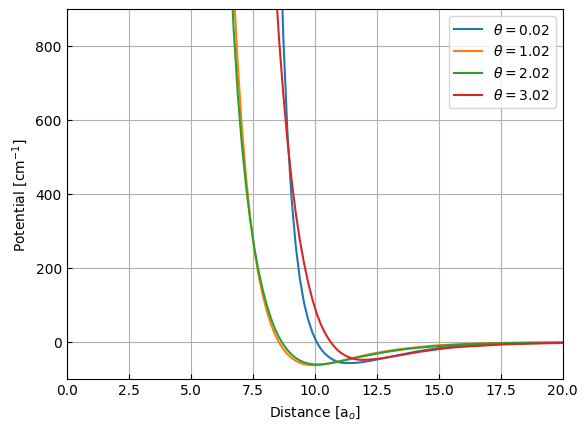

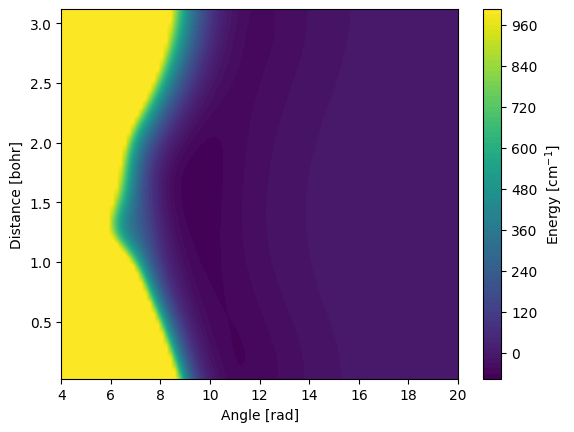

In [12]:
V_grid = load_potential(path, "potential.dat", r_grid, polar_grid, kx=5, ky=5, is_gamma=False)

fig, ax = utility.plot()
for i in range(0, len(polar_points), 32):
    ax.plot(r_points, V_grid[:, i] / cm_inv, label=r"$\theta = {:.2f}$".format(polar_points[i]))
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 900)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


np.clip(V_grid, -10000 * cm_inv, 1000 * cm_inv, out=V_grid)
fig, ax = plt.subplots()
cs = ax.contourf(r_points, polar_points, V_grid.transpose() / cm_inv, levels=100)
ax.set_xlim(4, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf")

XPi Sigma

Text(0, 0.5, 'X$\\Pi$ gamma [cm$^{-1}$]')

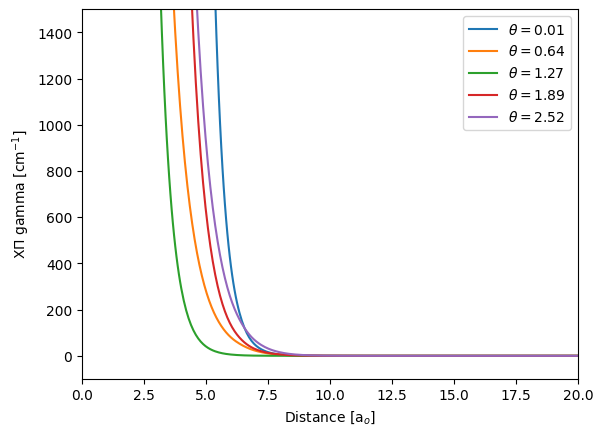

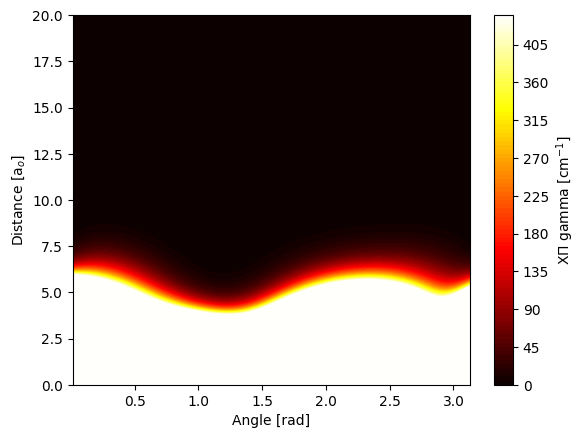

In [3]:
V_grid = load_potential(path, "XPi_gamma.dat", r_grid, polar_grid, kx=5, ky=5, is_gamma=True)

fig, ax = plt.subplots()
for i in range(0, len(polar_points), 32):
    ax.plot(r_points, V_grid[:, i] / cm_inv, label=r"$\theta = {:.2f}$".format(polar_points[i]))
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 1500)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"X$\Pi$ gamma [cm$^{-1}$]")

np.clip(V_grid, -5e-4, 2e-3, out=V_grid)
fig, ax = plt.subplots()
cs = ax.contourf(polar_points, r_points, V_grid / cm_inv, cmap="hot", levels=100)
ax.set_ylim(0, 20)


ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [a$_o$]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"X$\Pi$ gamma [cm$^{-1}$]")

B sigma

Text(0, 0.5, 'B$\\Sigma$ gamma [cm$^{-1}$]')

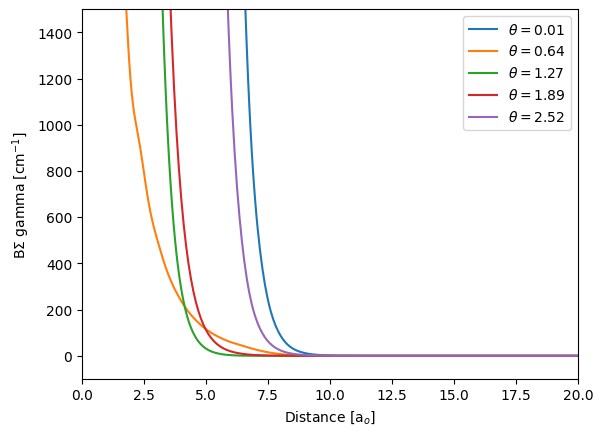

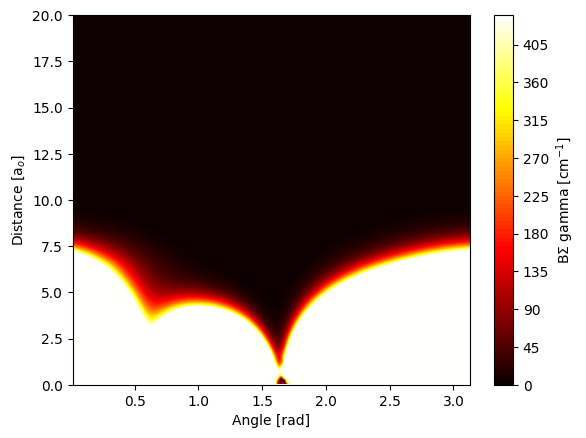

In [4]:
V_grid = load_potential(path, "BSigma_gamma.dat", r_grid, polar_grid, kx=5, ky=5, is_gamma=True)

fig, ax = plt.subplots()
for i in range(0, len(polar_points), 32):
    ax.plot(r_points, V_grid[:, i] / cm_inv, label=r"$\theta = {:.2f}$".format(polar_points[i]))
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 1500)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"B$\Sigma$ gamma [cm$^{-1}$]")

np.clip(V_grid, -5e-4, 2e-3, out=V_grid)
fig, ax = plt.subplots()
cs = ax.contourf(polar_points, r_points, V_grid / cm_inv, cmap="hot", levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [a$_o$]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"B$\Sigma$ gamma [cm$^{-1}$]")

A Pi

Text(0, 0.5, 'A$\\Pi$ gamma [cm$^{-1}$]')

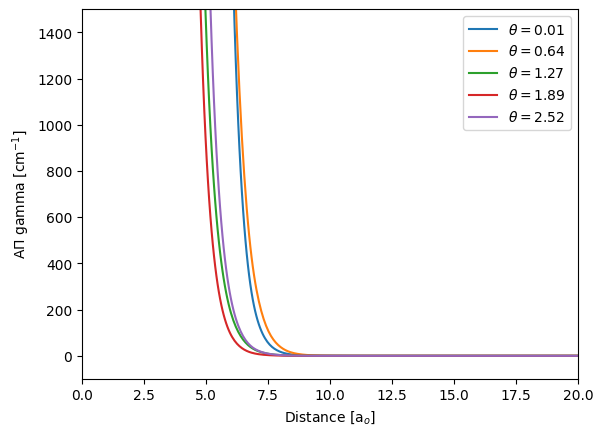

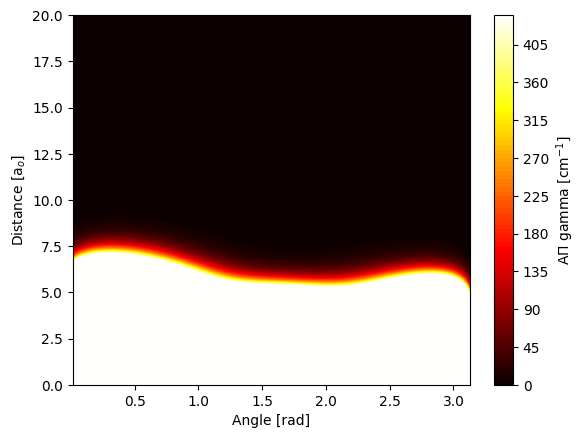

In [5]:
V_grid = load_potential(path, "APi_gamma.dat", r_grid, polar_grid, kx=5, ky=5, is_gamma=True)

fig, ax = plt.subplots()
for i in range(0, len(polar_points), 32):
    ax.plot(r_points, V_grid[:, i] / cm_inv, label=r"$\theta = {:.2f}$".format(polar_points[i]))
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 1500)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"A$\Pi$ gamma [cm$^{-1}$]")

np.clip(V_grid, -5e-4, 2e-3, out=V_grid)
fig, ax = plt.subplots()
cs = ax.contourf(polar_points, r_points, V_grid / cm_inv, cmap="hot", levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [a$_o$]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"A$\Pi$ gamma [cm$^{-1}$]")

In [6]:
import os

data_path = "data/"
if not os.path.exists(data_path):
    os.makedirs(data_path)

KELVIN = 3.1668105e-6
U = 1822.88839
CM_INV = 4.55633e-6

def centrifugal(r_points, j_tot: int, omega: int, mass_u: float):
    return (j_tot * (j_tot + 1) - 2 * omega * omega) / (2 * mass_u * U * np.power(r_points, 2)) 

class Potential:
    def __init__(self, r_o, r_c, r_s, d6_o, d6_c, d6_s, re_o, re_c, re_s, sigma):
        self.r_o = r_o
        self.r_c = r_c
        self.r_s = r_s
        self.d6_o = d6_o
        self.d6_c = d6_c
        self.d6_s = d6_s
        self.re_o = re_o
        self.re_c = re_c
        self.re_s = re_s
        self.sigma = sigma
    
    @staticmethod
    def default():
        return Potential(3.1787, 0.9908, -1.957, 
                         50 * CM_INV, 50 * CM_INV, 50 * CM_INV, 
                         8, 8, 8, 
                         0)

    def value(self, r, theta):
        r_o = np.sqrt(r ** 2 + self.r_o ** 2 - 2 * r * self.r_o * np.cos(theta))
        r_c = np.sqrt(r ** 2 + self.r_c ** 2 - 2 * r * self.r_c * np.cos(theta))
        r_s = np.sqrt(r ** 2 + self.r_s ** 2 - 2 * r * self.r_s * np.cos(theta))

        pot_o = self.d6_o * (self.re_o / r_o) ** 6 * ((self.re_o / r_o) ** 6 - 2)
        pot_c = self.d6_c * (self.re_c / r_c) ** 6 * ((self.re_c / r_c) ** 6 - 2)
        pot_s = self.d6_s * (self.re_s / r_s) ** 6 * ((self.re_s / r_s) ** 6 - 2)

        pot_sigma = -self.sigma * np.cos(theta) ** 2 / (r ** 6)

        return pot_o + pot_c + pot_s + pot_sigma

In [17]:
import scipy.optimize as opt

def fit_potential(r_theta, d6_o, d6_c, d6_s, re_o, re_c, re_s, sigma):
    r_o, r_c, r_s = 3.1787, 0.9908, -1.957
    potential = Potential(r_o, r_c, r_s, d6_o, d6_c, d6_s, re_o, re_c, re_s, sigma)

    return potential.value(r_theta[0], r_theta[1])

theta, r, pot = load_from_file("../potentials/", "potential.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

r = r[10:]
pot = pot[:, 10:]

theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")

p0 = [25 * CM_INV, 25 * CM_INV, 25 * CM_INV, 
    8, 8, 9, 
    100]
p, err = opt.curve_fit(fit_potential, (r_mesh.ravel(), theta_mesh.ravel()), pot.ravel(), p0, method='dogbox')

[1.09853700e-11 2.35435928e-04 7.63334226e-05 2.89643377e+01
 9.73677283e+00 1.02445905e+01 1.23674328e+02]


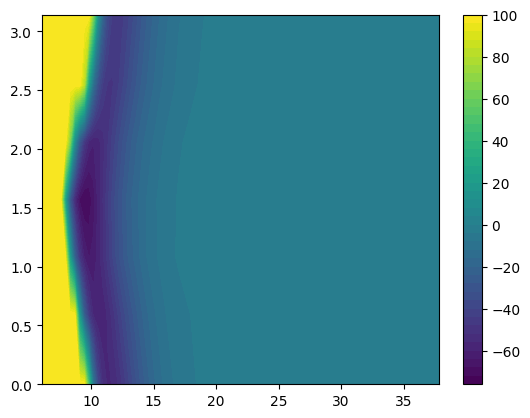

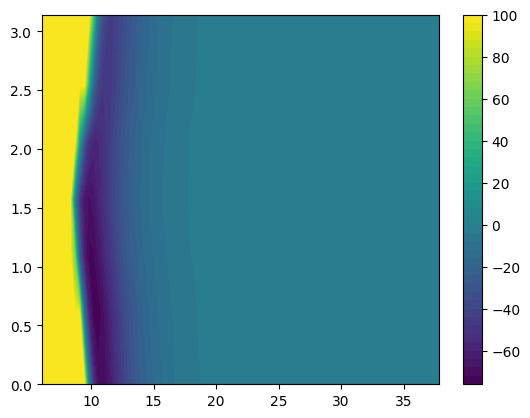

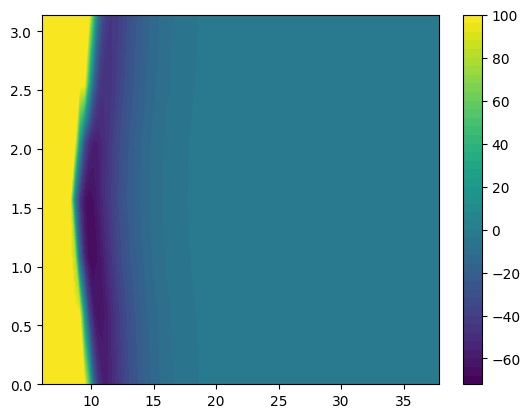

In [20]:
theta, r, pot = load_from_file("../potentials/", "potential.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")

potential = np.clip(pot / CM_INV, -1000, 100)

fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential, levels=50)
cbar = fig.colorbar(CS)

p1 = [1.09853700e-5, 2.35435928e-04, 7.63334226e-05, 
      8.9643377e+00, 9.73677283e+00, 1.02445905e+01, 
      1.23674328e+02]

potential = np.clip(fit_potential((r_mesh, theta_mesh), *p1) / CM_INV, -1000, 100)
fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential, levels=50)
cbar = fig.colorbar(CS)

print(p)
potential = np.clip(fit_potential((r_mesh, theta_mesh), *p) / CM_INV, -1000, 100)
fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential, levels=50)
cbar = fig.colorbar(CS)